In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time, TimeDelta

In [2]:
mjd_unixtimestamp_offset = 10587.5
seconds_in_day = 3600 * 24

def mjd2unixtimestamp(m):
    return (m - mjd_unixtimestamp_offset) * seconds_in_day

In [3]:
def load_file(path):
    ncols = 7
    data = np.fromfile(path, sep=' ')
    return data.reshape((data.size // ncols, ncols))

The file below is obtained by running the `photo_planning.script` GMAT script.

In [4]:
data = load_file('/home/daniel/jupyter_notebooks/dslwp/EarthMoonPosDSWLP.txt')
t = Time(mjd2unixtimestamp(data[:,0]), format='unix')

In [5]:
def distance(x):
    return np.sqrt(np.sum(x**2, axis=1))

def angle(x):
    return np.rad2deg(np.arccos(x[:,0] / distance(x)))

def angular_radius(x, r):
    return np.rad2deg(np.arcsin(r / distance(x)))

In [6]:
earth_angle = angle(data[:,1:4])
moon_angle = angle(data[:,4:7])
earth_radius = 6378.1
moon_radius = 1737.1
earth_angular_radius = angular_radius(data[:,1:4], earth_radius)
moon_angular_radius = angular_radius(data[:,4:7], moon_radius)

In [7]:
camera_fov_long = 18.5
camera_fov_short = 14

In [8]:
photo_times = Time(['2018-10-8 08:21', '2018-10-8 13:00', '2018-10-9 5:25', '2018-10-10 2:18', '2018-10-10 14:00'])
photo_times_end = photo_times + TimeDelta(2*3600, format='sec')
calibration_time = Time('2018-10-6 13:55')

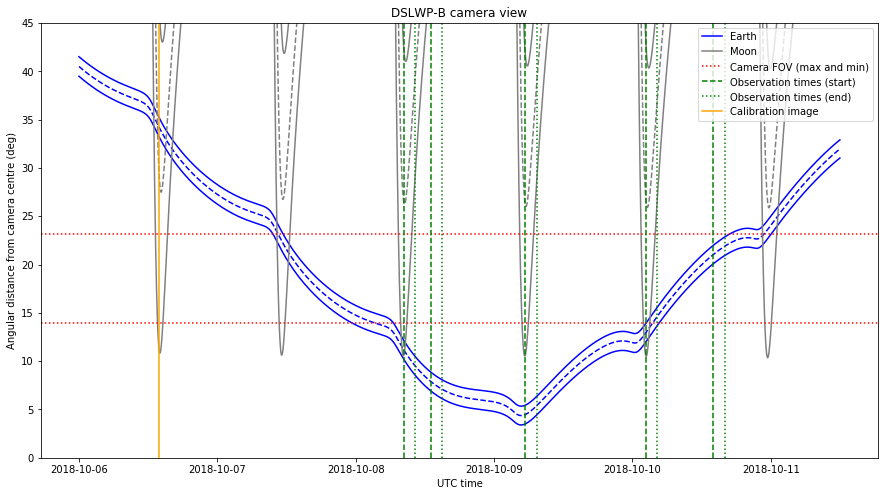

In [9]:
plt.figure(figsize = [15,8], facecolor='w')
plt.plot(t.datetime, earth_angle, color = 'blue', linestyle = '--')
plt.plot(t.datetime, earth_angle-earth_angular_radius, color = 'blue', label='Earth')
plt.plot(t.datetime, earth_angle+earth_angular_radius, color = 'blue')
plt.plot(t.datetime, moon_angle, color = 'grey', linestyle = '--')
plt.plot(t.datetime, moon_angle-moon_angular_radius, color = 'grey', label='Moon')
plt.plot(t.datetime, moon_angle+moon_angular_radius, color = 'grey')
plt.axhline(y=camera_fov_short, linestyle=':', color = 'red')
plt.axhline(y=np.sqrt(camera_fov_short**2 + camera_fov_long**2), linestyle=':', color = 'red', label='Camera FOV (max and min)')
plt.ylim([0,45])
for j,obs in enumerate(photo_times.datetime):
    if j == 0:
        plt.axvline(x=obs, color = 'green', label='Observation times (start)', linestyle = '--')
    else:
        plt.axvline(x=obs, color = 'green', linestyle = '--')
for j,obs in enumerate(photo_times_end.datetime):
    if j == 0:
        plt.axvline(x=obs, color = 'green', label='Observation times (end)', linestyle = ':')
    else:
        plt.axvline(x=obs, color = 'green', linestyle = ':')
plt.axvline(x=calibration_time.datetime, color = 'orange', label = 'Calibration image')
plt.legend(loc='upper right')
plt.ylabel('Angular distance from camera centre (deg)')
plt.xlabel('UTC time')
plt.title('DSLWP-B camera view');